In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices
import missingno as msno
%matplotlib inline

# Import Master Data

In [5]:
df = pd.read_csv("hackthetrail.csv")
df[:2]

,Time,Butler Trail : Crenshaw Bridge - Urban Trail,Butler Trail: South Lamar - Urban Trail,Butler Trail: North Congress - Urban Trail,Butler Trail : Longhorn Dam - Urban Trail,Shoal Creek Trail & 24th St- Urban Trail
0,2/17/16 0:00,4242.0,NaN,NaN,NaN,NaN
1,2/18/16 0:00,4979.0,NaN,NaN,NaN,NaN


In [6]:
df["Time"] = pd.to_datetime(df['Time'])
df = df.set_index("Time")
print(df.shape)
print(df.index.min(), 'to', df.index.max())
df.tail()

(1346, 5)
2016-02-17 00:00:00 to 2019-10-24 00:00:00


,Butler Trail : Crenshaw Bridge - Urban Trail,Butler Trail: South Lamar - Urban Trail,Butler Trail: North Congress - Urban Trail,Butler Trail : Longhorn Dam - Urban Trail,Shoal Creek Trail & 24th St- Urban Trail
Time,,,,,
2019-10-20,2510.0,2510.0,NaN,1699.0,329.0
2019-10-21,2839.0,2911.0,NaN,961.0,674.0
2019-10-22,3101.0,2753.0,NaN,918.0,483.0
2019-10-23,2107.0,1995.0,NaN,987.0,329.0
2019-10-24,2076.0,1813.0,NaN,742.0,199.0


 Make the Column Names easier to reference

In [7]:
df.columns = ['Crenshaw Bridge','South Lamar','North Congress','Longhorn Dam','Shoal Creek']

#### View Plots

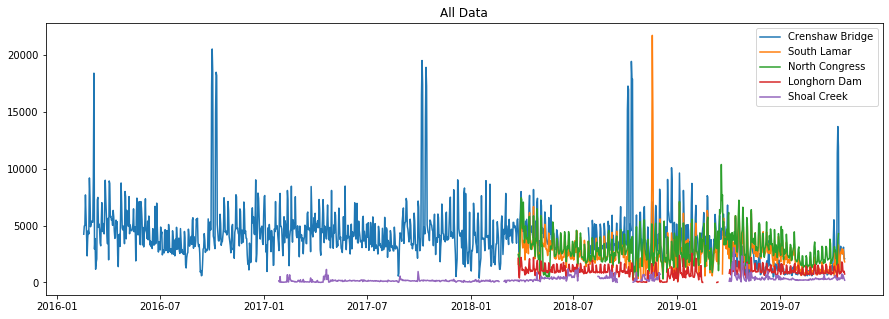

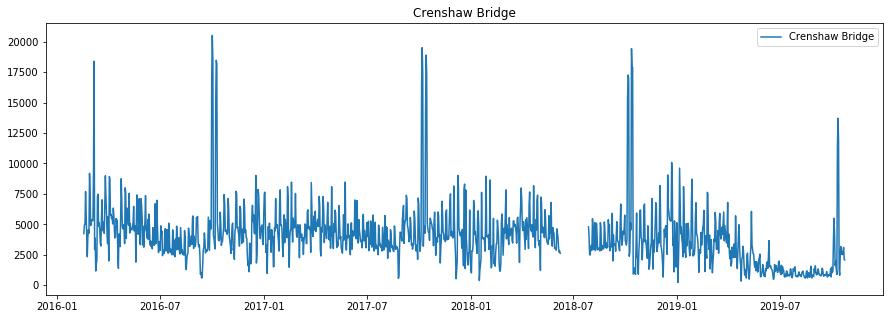

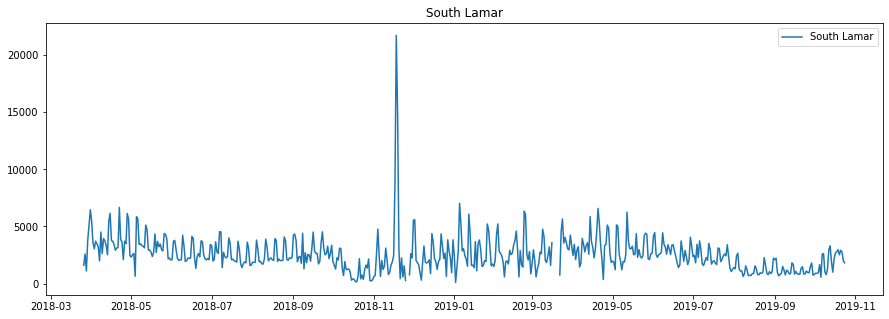

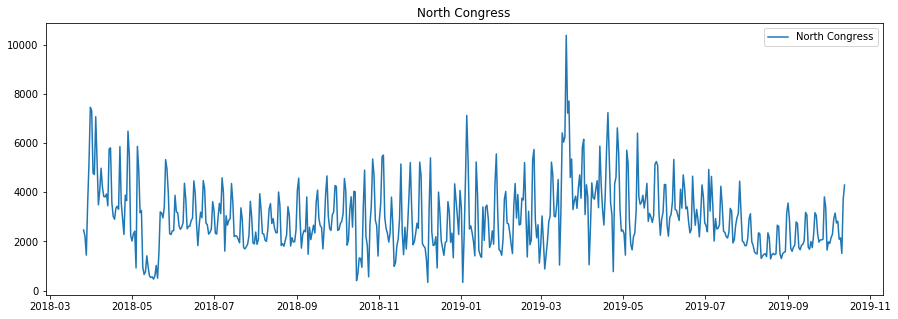

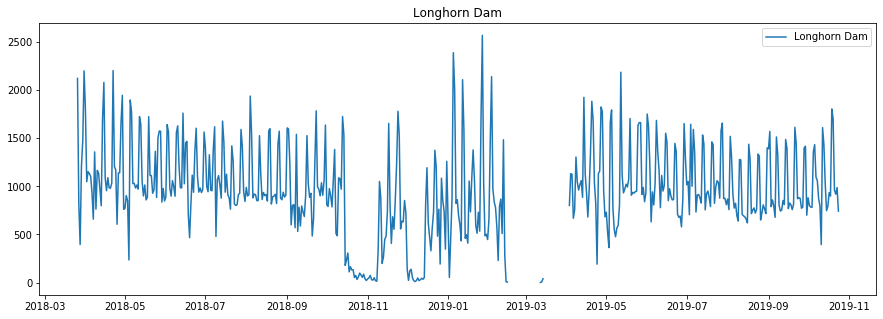

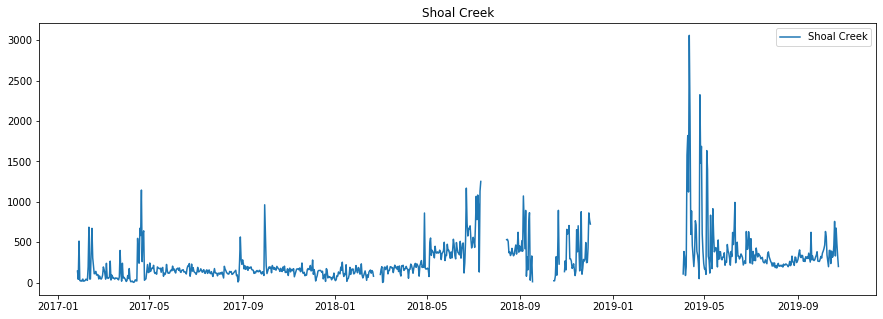

In [10]:
#All Channels
fig, ax = plt.subplots(figsize=(15,5))
for c in df.columns:
    plt.plot(df[c], label=c)
plt.legend()
plt.title("All Data")
plt.show()

# Individual Plots
for c in df.columns:
    fig, ax = plt.subplots(figsize=(15,5))
    plt.plot(df[c], label=c)
    plt.legend()
    plt.title("{}".format(c))
    plt.show()


# Parse Dates & Add Weather Data

In [11]:
weather = pd.read_csv("weather_10-22-19.csv")
weather.drop(["STATION","NAME"], axis=1, inplace=True)
weather["datetime"] = pd.to_datetime(weather["DATE"])
weather["day"] = weather["datetime"].dt.dayofweek
#weather["doy"] = weather["datetime"].dt.dayofyear
weather["month"] = weather["datetime"].dt.month
weather["woy"] = weather["datetime"].dt.weekofyear
weather = weather.set_index("datetime")
weather.drop("DATE", axis=1, inplace=True)
weather.tail()

,PRCP,TMAX,TMIN,day,month,woy
datetime,,,,,,
2019-10-18,0.0,74,47,4,10,42
2019-10-19,0.0,82,48,5,10,42
2019-10-20,0.0,92,61,6,10,42
2019-10-21,0.4,90,59,0,10,43
2019-10-22,0.0,76,48,1,10,43


In [114]:
dfm = df.merge(weather, left_index=True, right_index=True).drop("Shoal Creek", axis=1)
dfm.tail()

,Crenshaw Bridge,South Lamar,North Congress,Longhorn Dam,PRCP,TMAX,TMIN,day,month,woy
2019-10-18,2549.0,2786.0,NaN,899.0,0.0,74,47,4,10,42
2019-10-19,2707.0,2959.0,NaN,1804.0,0.0,82,48,5,10,42
2019-10-20,2510.0,2510.0,NaN,1699.0,0.0,92,61,6,10,42
2019-10-21,2839.0,2911.0,NaN,961.0,0.4,90,59,0,10,43
2019-10-22,3101.0,2753.0,NaN,918.0,0.0,76,48,1,10,43


# Evaluate Missing Values

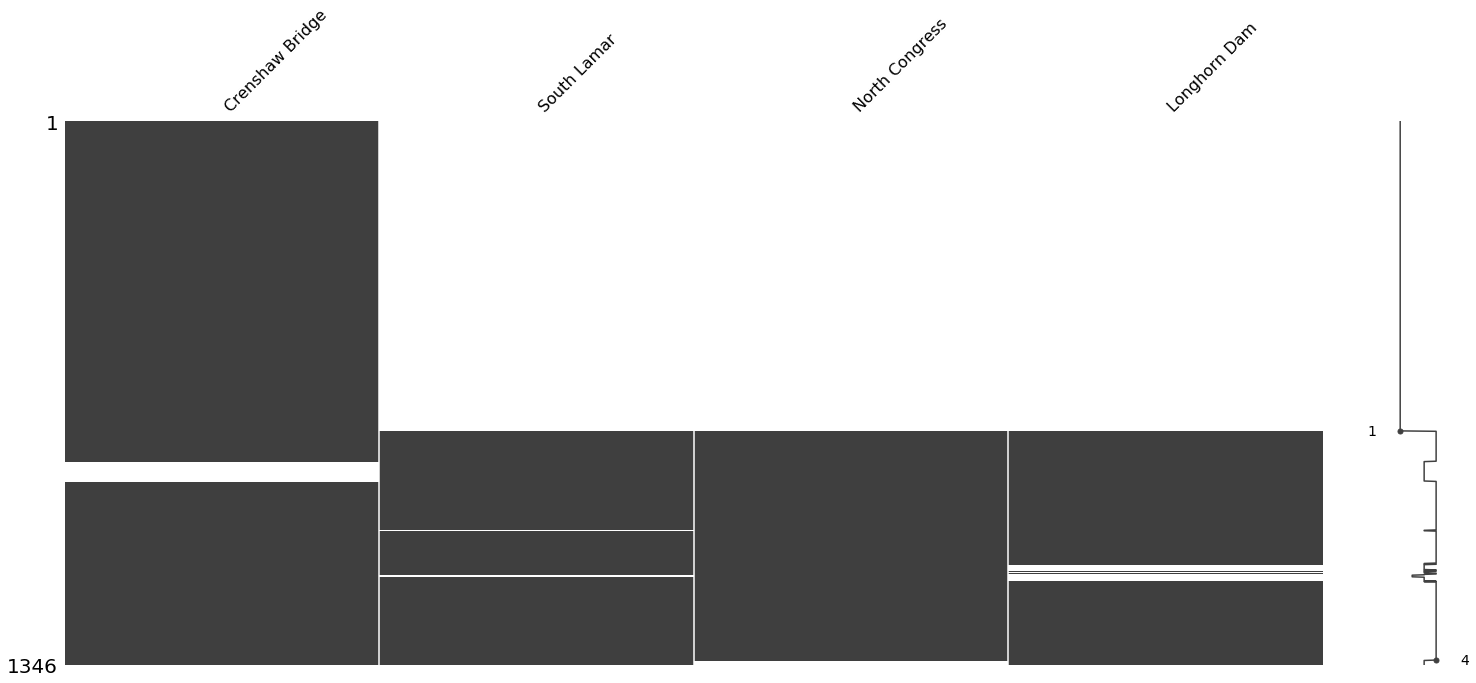

In [115]:
df2 = df.copy().drop("Shoal Creek",axis=1)
msno.matrix(df2)
plt.show()

#### View the number of nulls in each column


In [116]:
for c in df2.columns:
    n = df2['2018-03-26':]
    print('nulls: ', n[c][n[c].isnull()==1].shape[0], '\t| {}'.format(c))

nulls:  49 	| Crenshaw Bridge
nulls:  7 	| South Lamar
nulls:  11 	| North Congress
nulls:  39 	| Longhorn Dam


### Clip the data from before `2018-03-26`

In [117]:
clipped = dfm.loc['2018-03-26':]
clipped.head()

,Crenshaw Bridge,South Lamar,North Congress,Longhorn Dam,PRCP,TMAX,TMIN,day,month,woy
2018-03-26,4628.0,1604.0,2463.0,2121.0,0.00,74,67,0,3,13
2018-03-27,3645.0,2579.0,2213.0,817.0,0.00,85,67,1,3,13
2018-03-28,1864.0,1098.0,1441.0,395.0,2.36,78,57,2,3,13
2018-03-29,5343.0,3755.0,3531.0,1210.0,0.32,66,51,3,3,13
2018-03-30,6457.0,5057.0,5204.0,1476.0,0.00,83,52,4,3,13


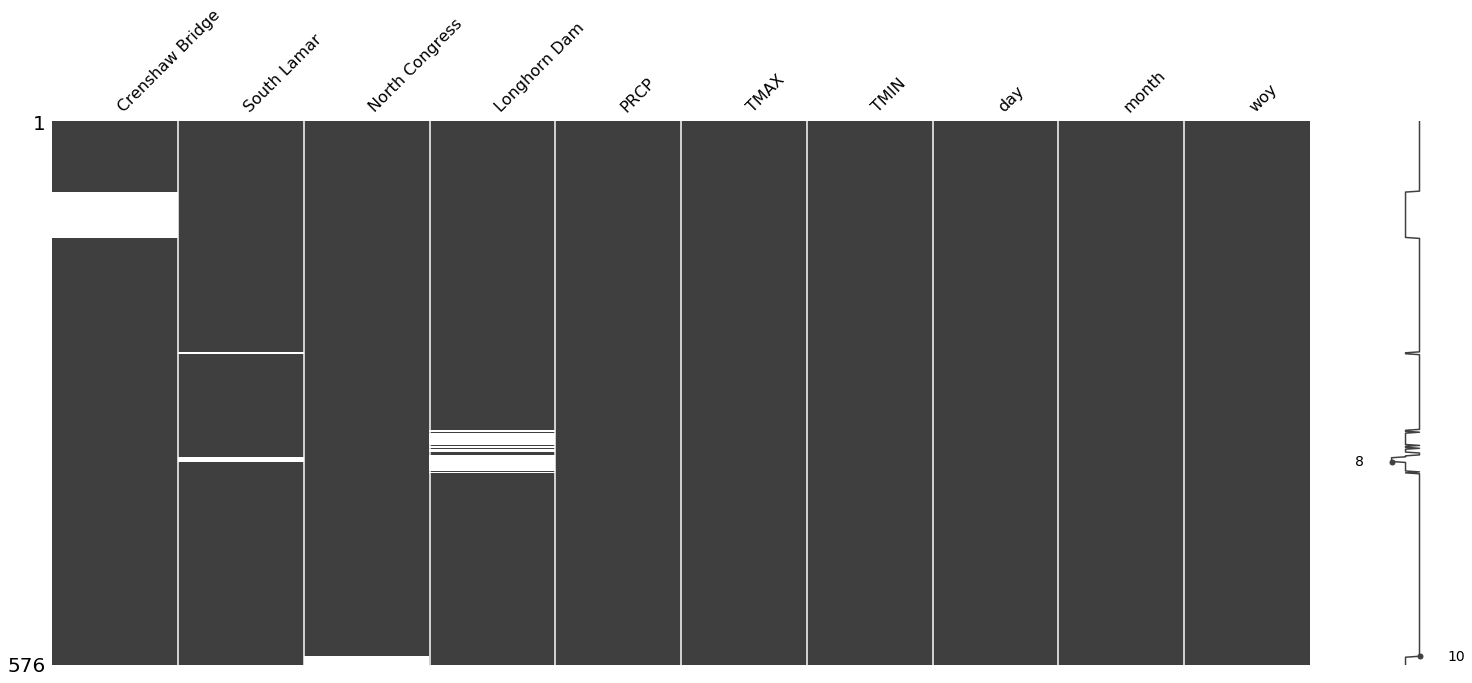

In [118]:
msno.matrix(clipped)
plt.show()

# Impute South Lamar (with North Congress data)

In [119]:
def impute_make_dataframes(df,target_col, path):
    dfnn = df.dropna()
    dfnn.to_csv(path + '{}_TRAIN.csv'.format(target_col))
    print("train frame shape:", dfnn.shape)
    df_missing = df[df[target_col].isnull()]
    print("null frame shape:", df_missing.shape)
    del df_missing[target_col]
    df_missing.to_csv(path + '{}_missing.csv'.format(target_col))
    return df_missing.index

In [120]:
idf = clipped.drop(["Crenshaw Bridge","Longhorn Dam"], axis=1)
SL_missing_indx = impute_make_dataframes(idf, "South Lamar",'data/')

train frame shape: (560, 8)
null frame shape: (7, 8)


Take the dataframes that were just created and use them in the Darwin UI or SDK to train a model and generate predictions. 

In [121]:
def merge_preds(preds_path, preds_idx, impute_df, target_col, df):
    preds = pd.read_csv(preds_path)
    preds['date'] = pd.to_datetime(preds_idx)
    preds.set_index("date", inplace=True)
    impute_df.loc[impute_df[target_col].isnull(), target_col] = preds
    
    print(clipped.isnull().any())
    
    plt.rcParams['figure.figsize']=[20,5]
    plt.plot(impute_df[target_col], label='imputed values')
    plt.plot(df[target_col], label = 'real values')
    plt.legend()
    plt.title("Imputation Results: {}".format(target_col))
    plt.show()

Crenshaw Bridge     True
South Lamar        False
North Congress      True
Longhorn Dam        True
PRCP               False
TMAX               False
TMIN               False
day                False
month              False
woy                False
dtype: bool


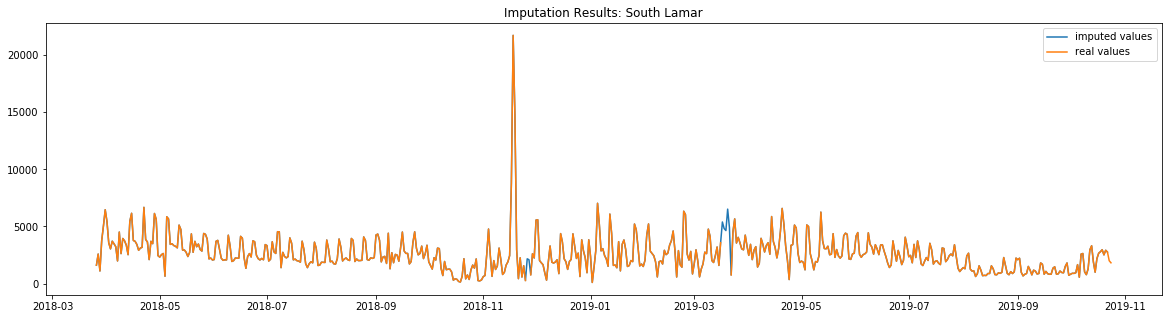

In [122]:
preds_path = "data/SouthLamarModel-SL_missing-ResultsTable.csv"
merge_preds(preds_path, SL_missing_indx, clipped, "South Lamar", df)

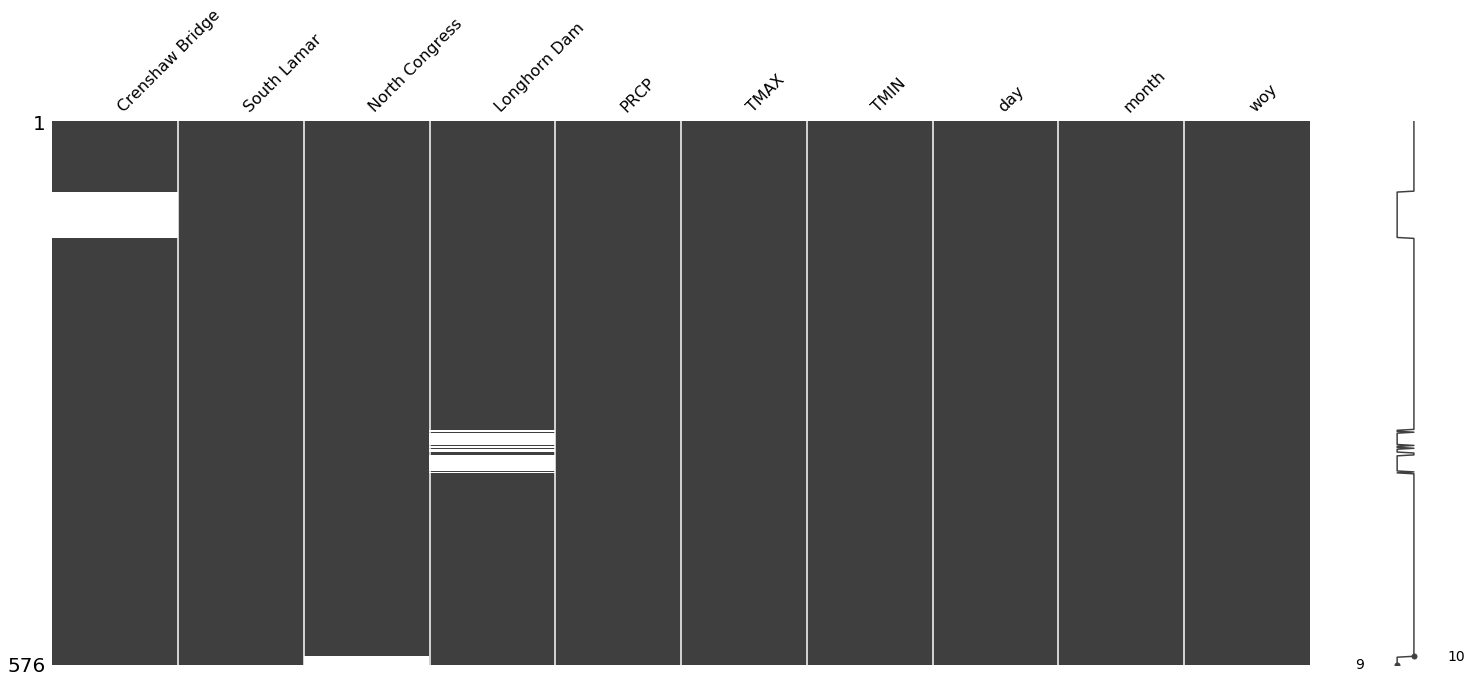

In [123]:
msno.matrix(clipped)
plt.show()

# Impute North Congress (with South Lamar data)

In [124]:
idf = clipped.drop(["Crenshaw Bridge","Longhorn Dam"], axis=1)
NC_missing_indx = impute_make_dataframes(idf, "North Congress",'data/')

train frame shape: (567, 8)
null frame shape: (9, 8)


Crenshaw Bridge     True
South Lamar        False
North Congress     False
Longhorn Dam        True
PRCP               False
TMAX               False
TMIN               False
day                False
month              False
woy                False
dtype: bool


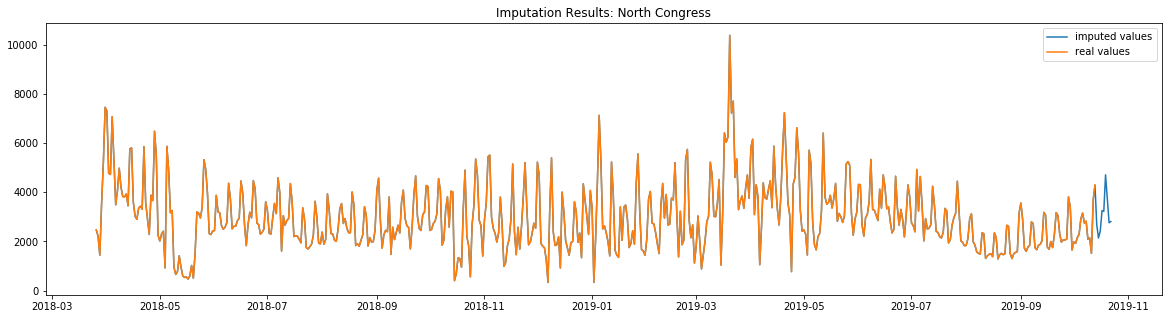

In [127]:
preds_path = "data/NorthCongressModel-North Congress_missing-ResultsTable.csv"
merge_preds(preds_path, NC_missing_indx, clipped, "North Congress", df)

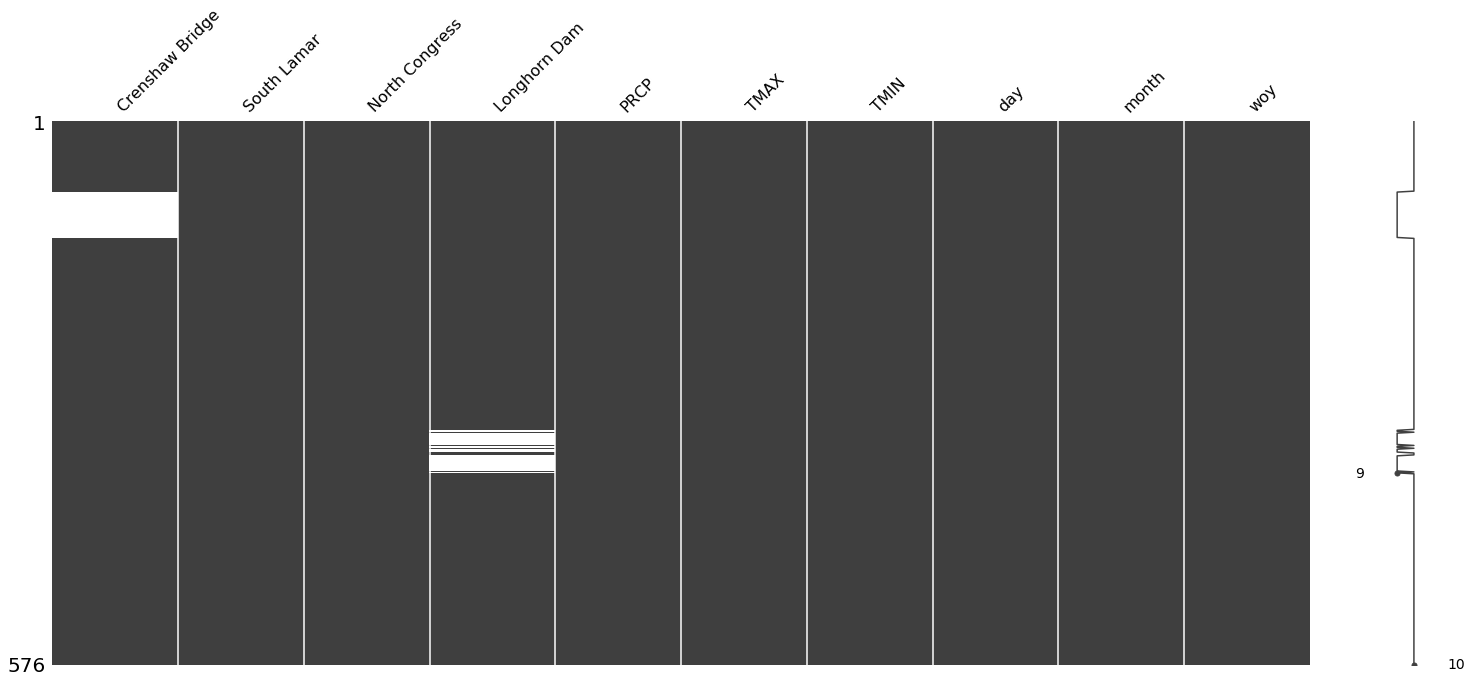

In [128]:
msno.matrix(clipped)
plt.show()

# Impute Crenshaw Bridge

In [125]:
idf = clipped.drop(["Longhorn Dam"], axis=1)
CB_missing_indx = impute_make_dataframes(idf, "Crenshaw Bridge",'data/')

train frame shape: (518, 9)
null frame shape: (49, 9)


Crenshaw Bridge    False
South Lamar        False
North Congress     False
Longhorn Dam        True
PRCP               False
TMAX               False
TMIN               False
day                False
month              False
woy                False
dtype: bool


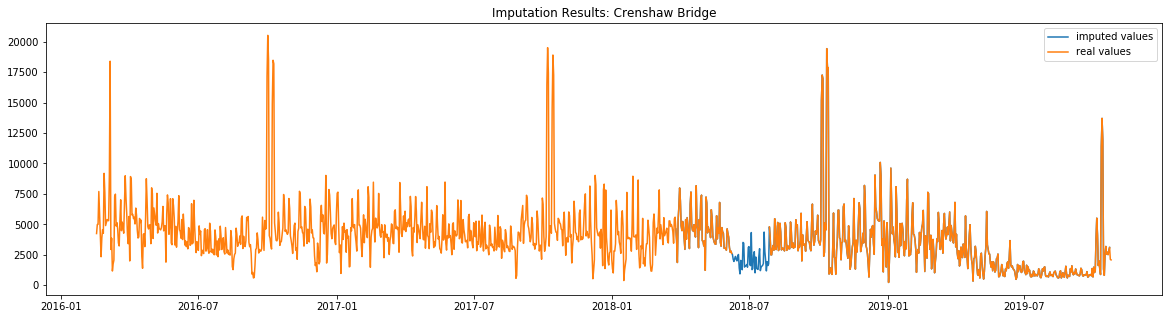

In [129]:
preds_path = "data/CrenshawBridgeModel-Crenshaw Bridge_missing-ResultsTable.csv"
merge_preds(preds_path, CB_missing_indx, clipped, "Crenshaw Bridge", df)

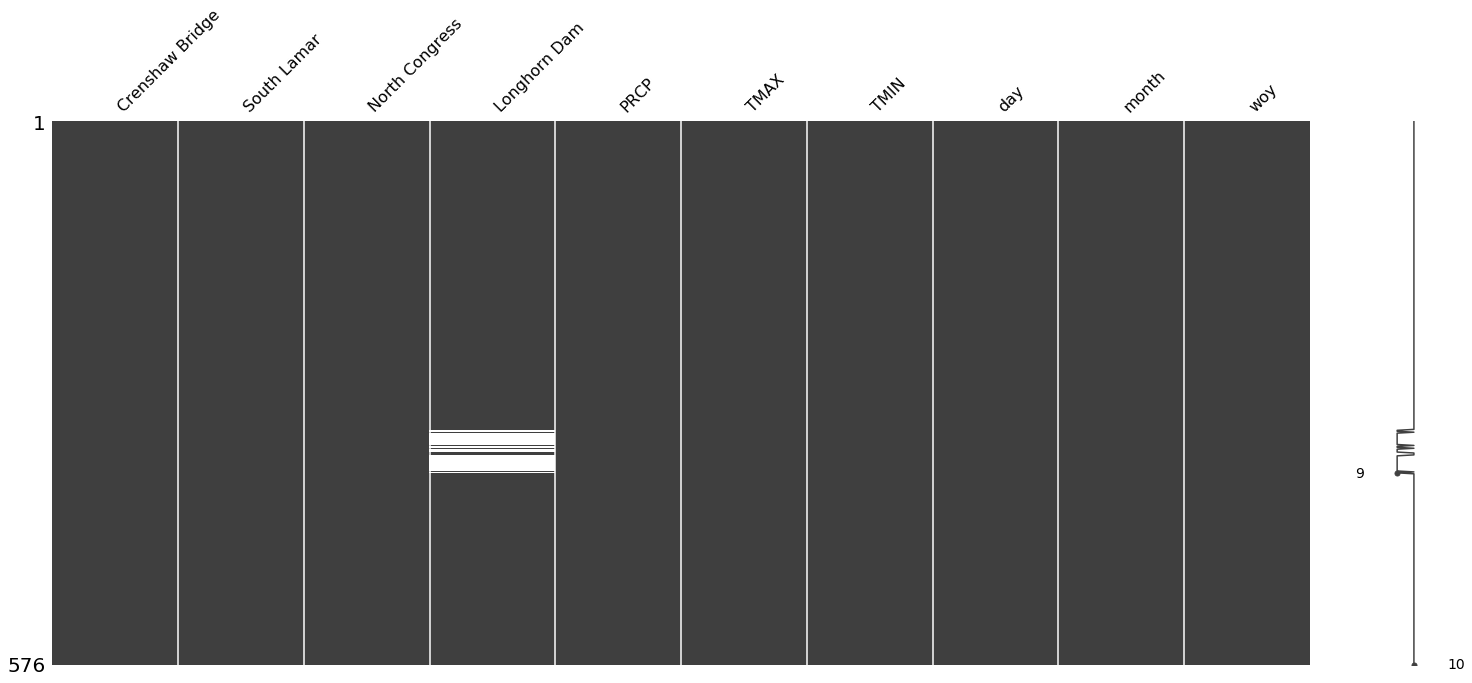

In [130]:
msno.matrix(clipped)
plt.show()

# Impute Longhorn Dam

In [126]:
idf = clipped.copy()
LD_missing_indx = impute_make_dataframes(idf, "Longhorn Dam",'data/')

train frame shape: (479, 10)
null frame shape: (39, 10)


Crenshaw Bridge    False
South Lamar        False
North Congress     False
Longhorn Dam       False
PRCP               False
TMAX               False
TMIN               False
day                False
month              False
woy                False
dtype: bool


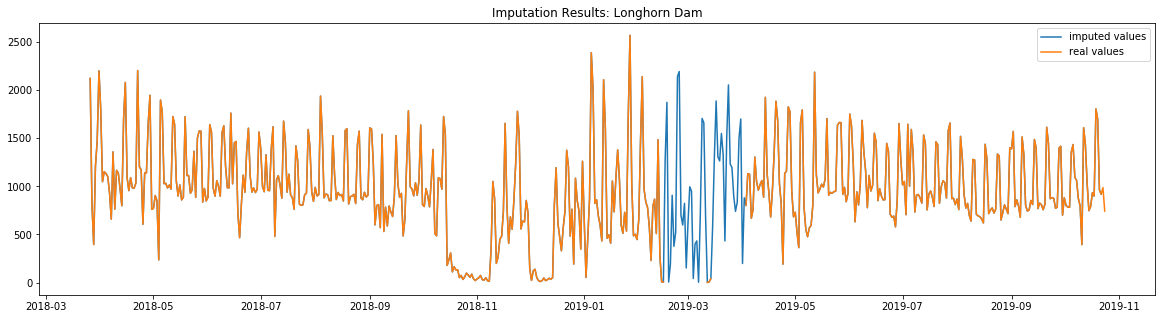

In [131]:
preds_path = "data/LonghornDamModel-Longhorn Dam_missing-ResultsTable.csv"
merge_preds(preds_path, LD_missing_indx, clipped, "Longhorn Dam", df)

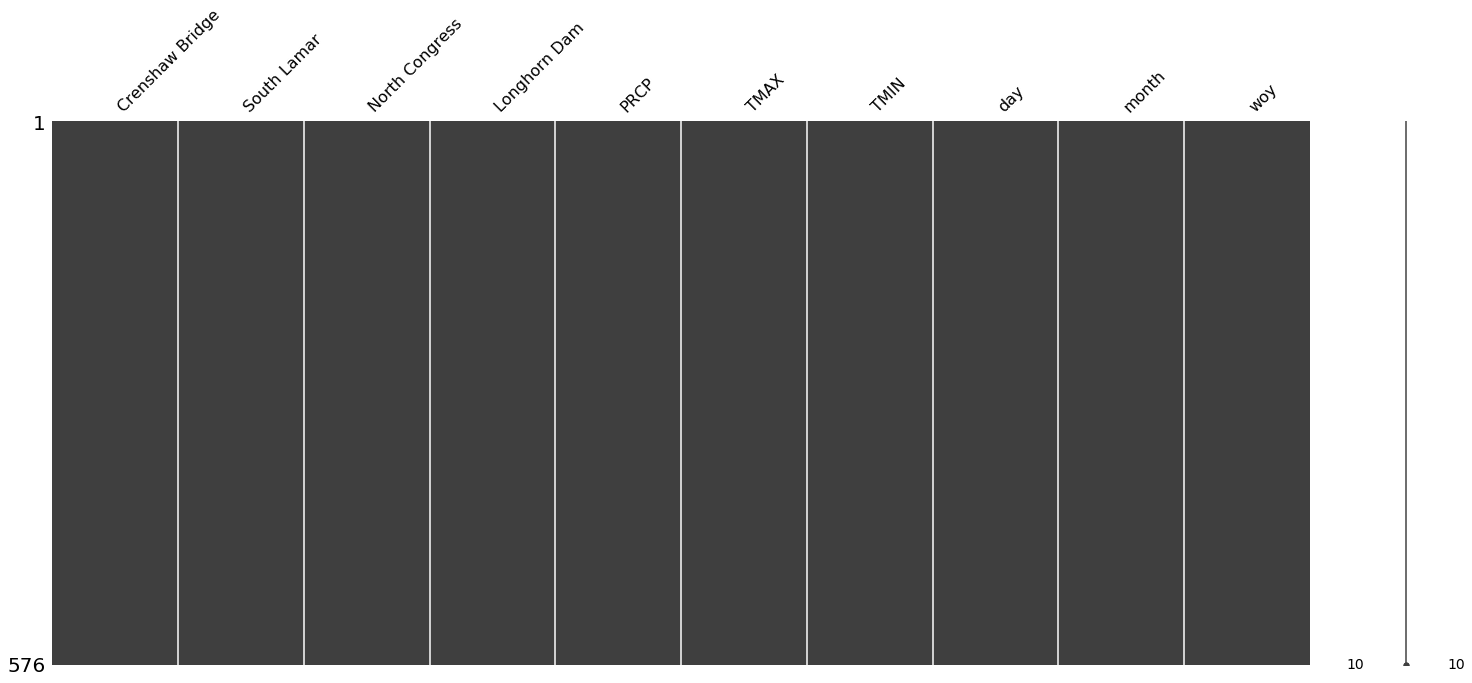

In [132]:
msno.matrix(clipped)
plt.show()

# Create Darwin Dataset to Train Model with Dawin

In [160]:
events_df = pd.read_csv("data/events_df.csv", usecols=["DATE","event_weight"])
events_df["DATE"] = pd.to_datetime(events_df["DATE"])
events_df.set_index("DATE", inplace=True)
print(events_df.shape)
events_df[:2]

(1346, 1)


,event_weight
DATE,
2019-01-01,2
2019-01-02,5


In [162]:
fullclipped = clipped.merge(events_df, left_index=True, right_index=True)
fullclipped[:2]

,Crenshaw Bridge,South Lamar,North Congress,Longhorn Dam,PRCP,TMAX,TMIN,day,month,woy,event_weight
2018-03-26,4628.0,1604.0,2463.0,2121.0,0.0,74,67,0,3,13,0
2018-03-27,3645.0,2579.0,2213.0,817.0,0.0,85,67,1,3,13,0


In [178]:
_80 = int(fullclipped.shape[0]*.96)
clipped_train = fullclipped[:_80]
clipped_test = fullclipped[_80:]

print(clipped_train.shape[0])
print(clipped_test.shape[0])

552
24


In [179]:
clipped_train.to_csv("data/fullclipped_train.csv")
clipped_test.to_csv("data/fullclipped_test.csv")

# Vizualize Events Relationship with Channel Data

In [170]:
from sklearn.preprocessing import StandardScaler
data = fullclipped.copy()
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data[:2]

,Crenshaw Bridge,South Lamar,North Congress,Longhorn Dam,PRCP,TMAX,TMIN,day,month,woy,event_weight
0,0.595181,-0.599826,-0.395473,2.433242,-0.298463,-0.518366,0.453599,-1.494054,-1.202493,-1.065284,-0.230362
1,0.190702,-0.000092,-0.584127,-0.294058,-0.298463,0.187646,0.453599,-0.994590,-1.202493,-1.065284,-0.230362


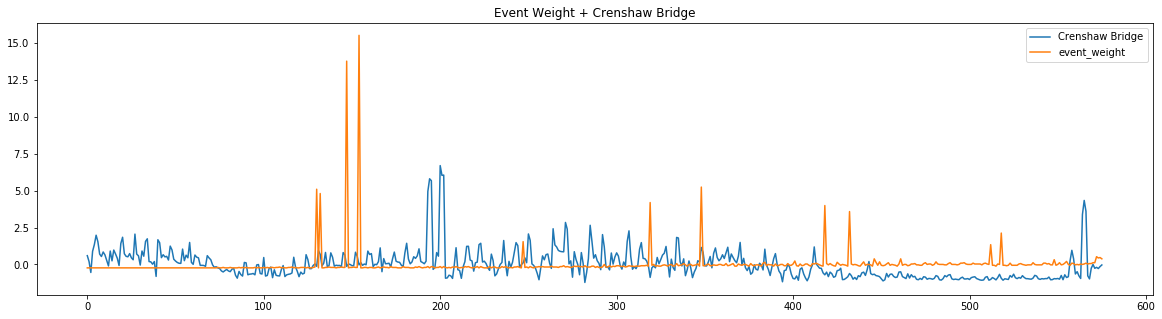

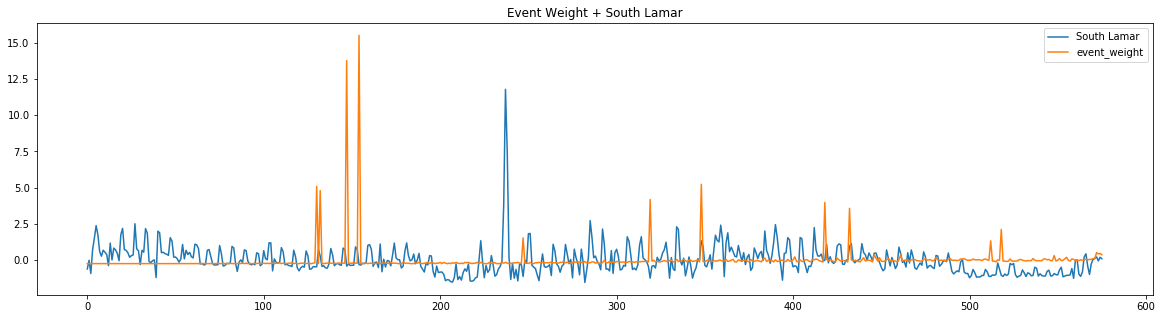

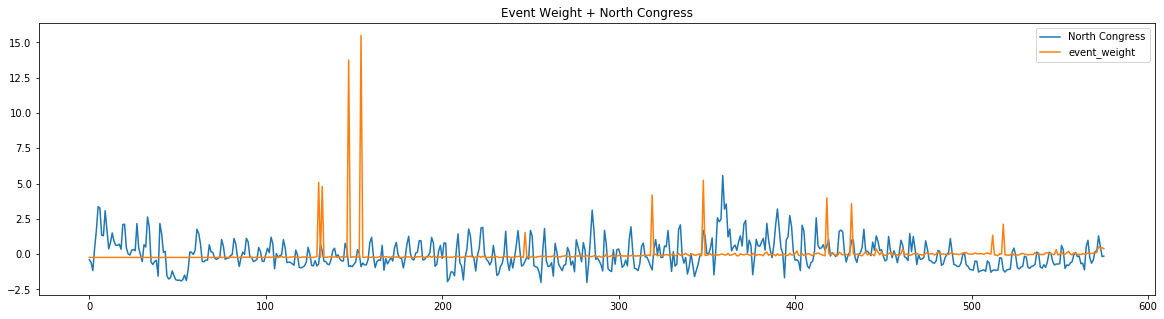

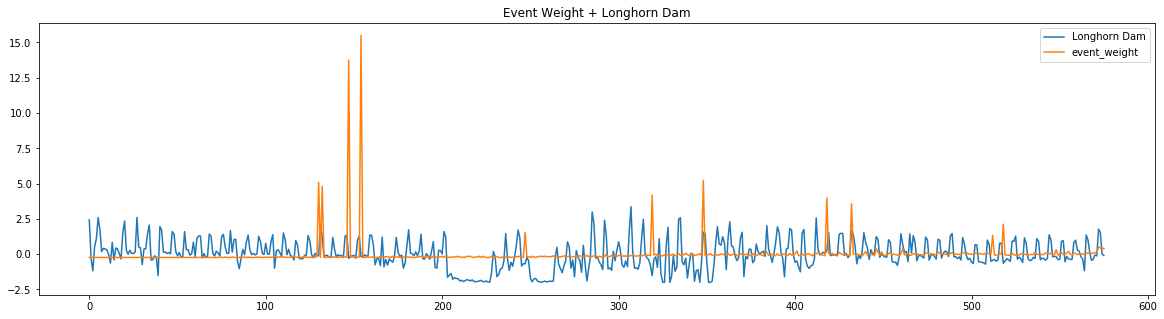

In [175]:
plt.rcParams['figure.figsize']=[20,5]
for c in ["Crenshaw Bridge","South Lamar","North Congress","Longhorn Dam"]:
    plt.plot(scaled_data[c], label=c)
    plt.plot(scaled_data["event_weight"], label="event_weight")
    plt.legend()
    plt.title("Event Weight + {}".format(c))
    plt.show()